# Predicting Real Estate Price Class

Kaggle username: abc2022

Name: Abiramy S

### Imports

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from numpy import interp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, roc_curve, auc, classification_report

### Reading data

In [52]:
raw_train = pd.read_csv('/Users/abiramy/Documents/dat200-ca4-2022/train.csv', index_col = 0)
raw_test = pd.read_csv('/Users/abiramy/Documents/dat200-ca4-2022/test.csv', index_col = 0)

### Data exploration and visualisation

In [109]:
# Get information about the data
print(f'Shape of the train data is: {raw_train.shape}')
print(f'Shape of the test data is: {raw_test.shape}')

Shape of the train data is: (11543, 15)
Shape of the test data is: (1230, 14)


In [112]:
print('Train head:') # print top 5 rows of the raw train set
raw_train.head()

Train head:


,Rooms,Type,Method,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Price class
0,4,h,S,6.4,3011.0,3.0,1.0,2.0,411.0,NaN,-37.79690,144.90490,Western Metropolitan,7570.0,1
1,4,h,S,14.6,3189.0,4.0,1.0,2.0,638.0,1972.0,-37.93780,145.05700,Southern Metropolitan,2555.0,1
2,5,h,PI,12.4,3107.0,5.0,4.0,2.0,968.0,1970.0,-37.77083,145.11516,Eastern Metropolitan,5420.0,1
3,3,h,SP,5.2,3056.0,3.0,1.0,2.0,264.0,NaN,-37.76110,144.96440,Northern Metropolitan,11918.0,0
4,3,h,S,8.8,3072.0,3.0,1.0,2.0,610.0,NaN,-37.75100,145.01970,Northern Metropolitan,14577.0,0


In [113]:
print('Test head:') # print top 5 rows of the raw test set
raw_test.head()

Test head:


,Rooms,Type,Method,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,4,t,SP,11.8,3105.0,4.0,2.0,2.0,190.0,2000.0,-37.76640,145.08840,Eastern Metropolitan,4480.0
1,3,h,VB,6.2,3123.0,3.0,1.0,2.0,616.0,1920.0,-37.81724,145.05688,Southern Metropolitan,6482.0
2,3,h,S,3.3,3206.0,3.0,2.0,2.0,0.0,2000.0,-37.84510,144.95110,Southern Metropolitan,3280.0
3,2,h,PI,13.9,3165.0,2.0,1.0,1.0,591.0,1960.0,-37.91790,145.07100,Southern Metropolitan,10969.0
4,2,h,PI,2.5,3067.0,2.0,2.0,1.0,124.0,2013.0,-37.80790,144.99770,Northern Metropolitan,4019.0


In [81]:
print('Train set desc. stat:')
raw_train.describe()

Train set desc. stat:


,Rooms,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount,Price class
count,11543.000000,11543.000000,11543.000000,11543.000000,11497.000000,11490.000000,11510.000000,6971.000000,11543.000000,11543.000000,11503.000000,11543.000000
mean,2.944122,10.158694,3105.288400,2.921164,1.535270,1.614534,531.192789,1964.764596,-37.809255,144.995236,7444.894375,0.438794
std,0.953200,5.864749,90.169874,0.966528,0.692812,0.958980,1538.730653,37.445970,0.079379,0.104103,4361.398756,0.607847
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,0.000000
25%,2.000000,6.200000,3044.000000,2.000000,1.000000,1.000000,180.000000,1940.000000,-37.857100,144.929500,4385.000000,0.000000
50%,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,442.000000,1970.000000,-37.802300,145.000150,6543.000000,0.000000
75%,3.000000,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,1999.000000,-37.756250,145.058200,10331.000000,1.000000
max,10.000000,48.100000,3977.000000,20.000000,8.000000,10.000000,76000.000000,2018.000000,-37.408530,145.526350,21650.000000,2.000000


In [80]:
print('Test set desc. stat:')
raw_test.describe()

Test set desc. stat:


,Rooms,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,2.913821,9.719106,3105.958537,2.882927,1.553659,1.541463,489.334146,1964.374797,-37.809943,144.991029,7551.995122
std,0.985189,5.815537,100.403470,0.970325,0.668943,0.925801,1167.584541,36.147832,0.075824,0.103413,4414.026372
min,1.000000,0.700000,3000.000000,1.000000,1.000000,0.000000,0.000000,1850.000000,-38.164390,144.571530,534.000000
25%,2.000000,5.900000,3044.000000,2.000000,1.000000,1.000000,140.000000,1940.000000,-37.853750,144.925425,4380.000000
50%,3.000000,8.800000,3084.000000,3.000000,1.000000,1.000000,371.000000,1970.000000,-37.807230,144.996750,6795.000000
75%,4.000000,12.600000,3146.000000,3.000000,2.000000,2.000000,642.000000,1998.750000,-37.759925,145.054005,10412.000000
max,7.000000,45.900000,3977.000000,7.000000,5.000000,9.000000,21700.000000,2017.000000,-37.496740,145.445300,21650.000000


In [58]:
# Check missing values in data
print(f'Missing values in train data:\n{raw_train.isna().sum()}\n')
print(f'Missing values in test data:\n{raw_test.isna().sum()}')

Missing values in train data:
Rooms               0
Type                0
Method              0
Distance            0
Postcode            0
Bedrooms            0
Bathroom           46
Car                53
Landsize           33
YearBuilt        4572
Lattitude           0
Longtitude          0
Regionname          0
Propertycount      40
Price class         0
dtype: int64

Missing values in test data:
Rooms            0
Type             0
Method           0
Distance         0
Postcode         0
Bedrooms         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


Pairplot of train data:


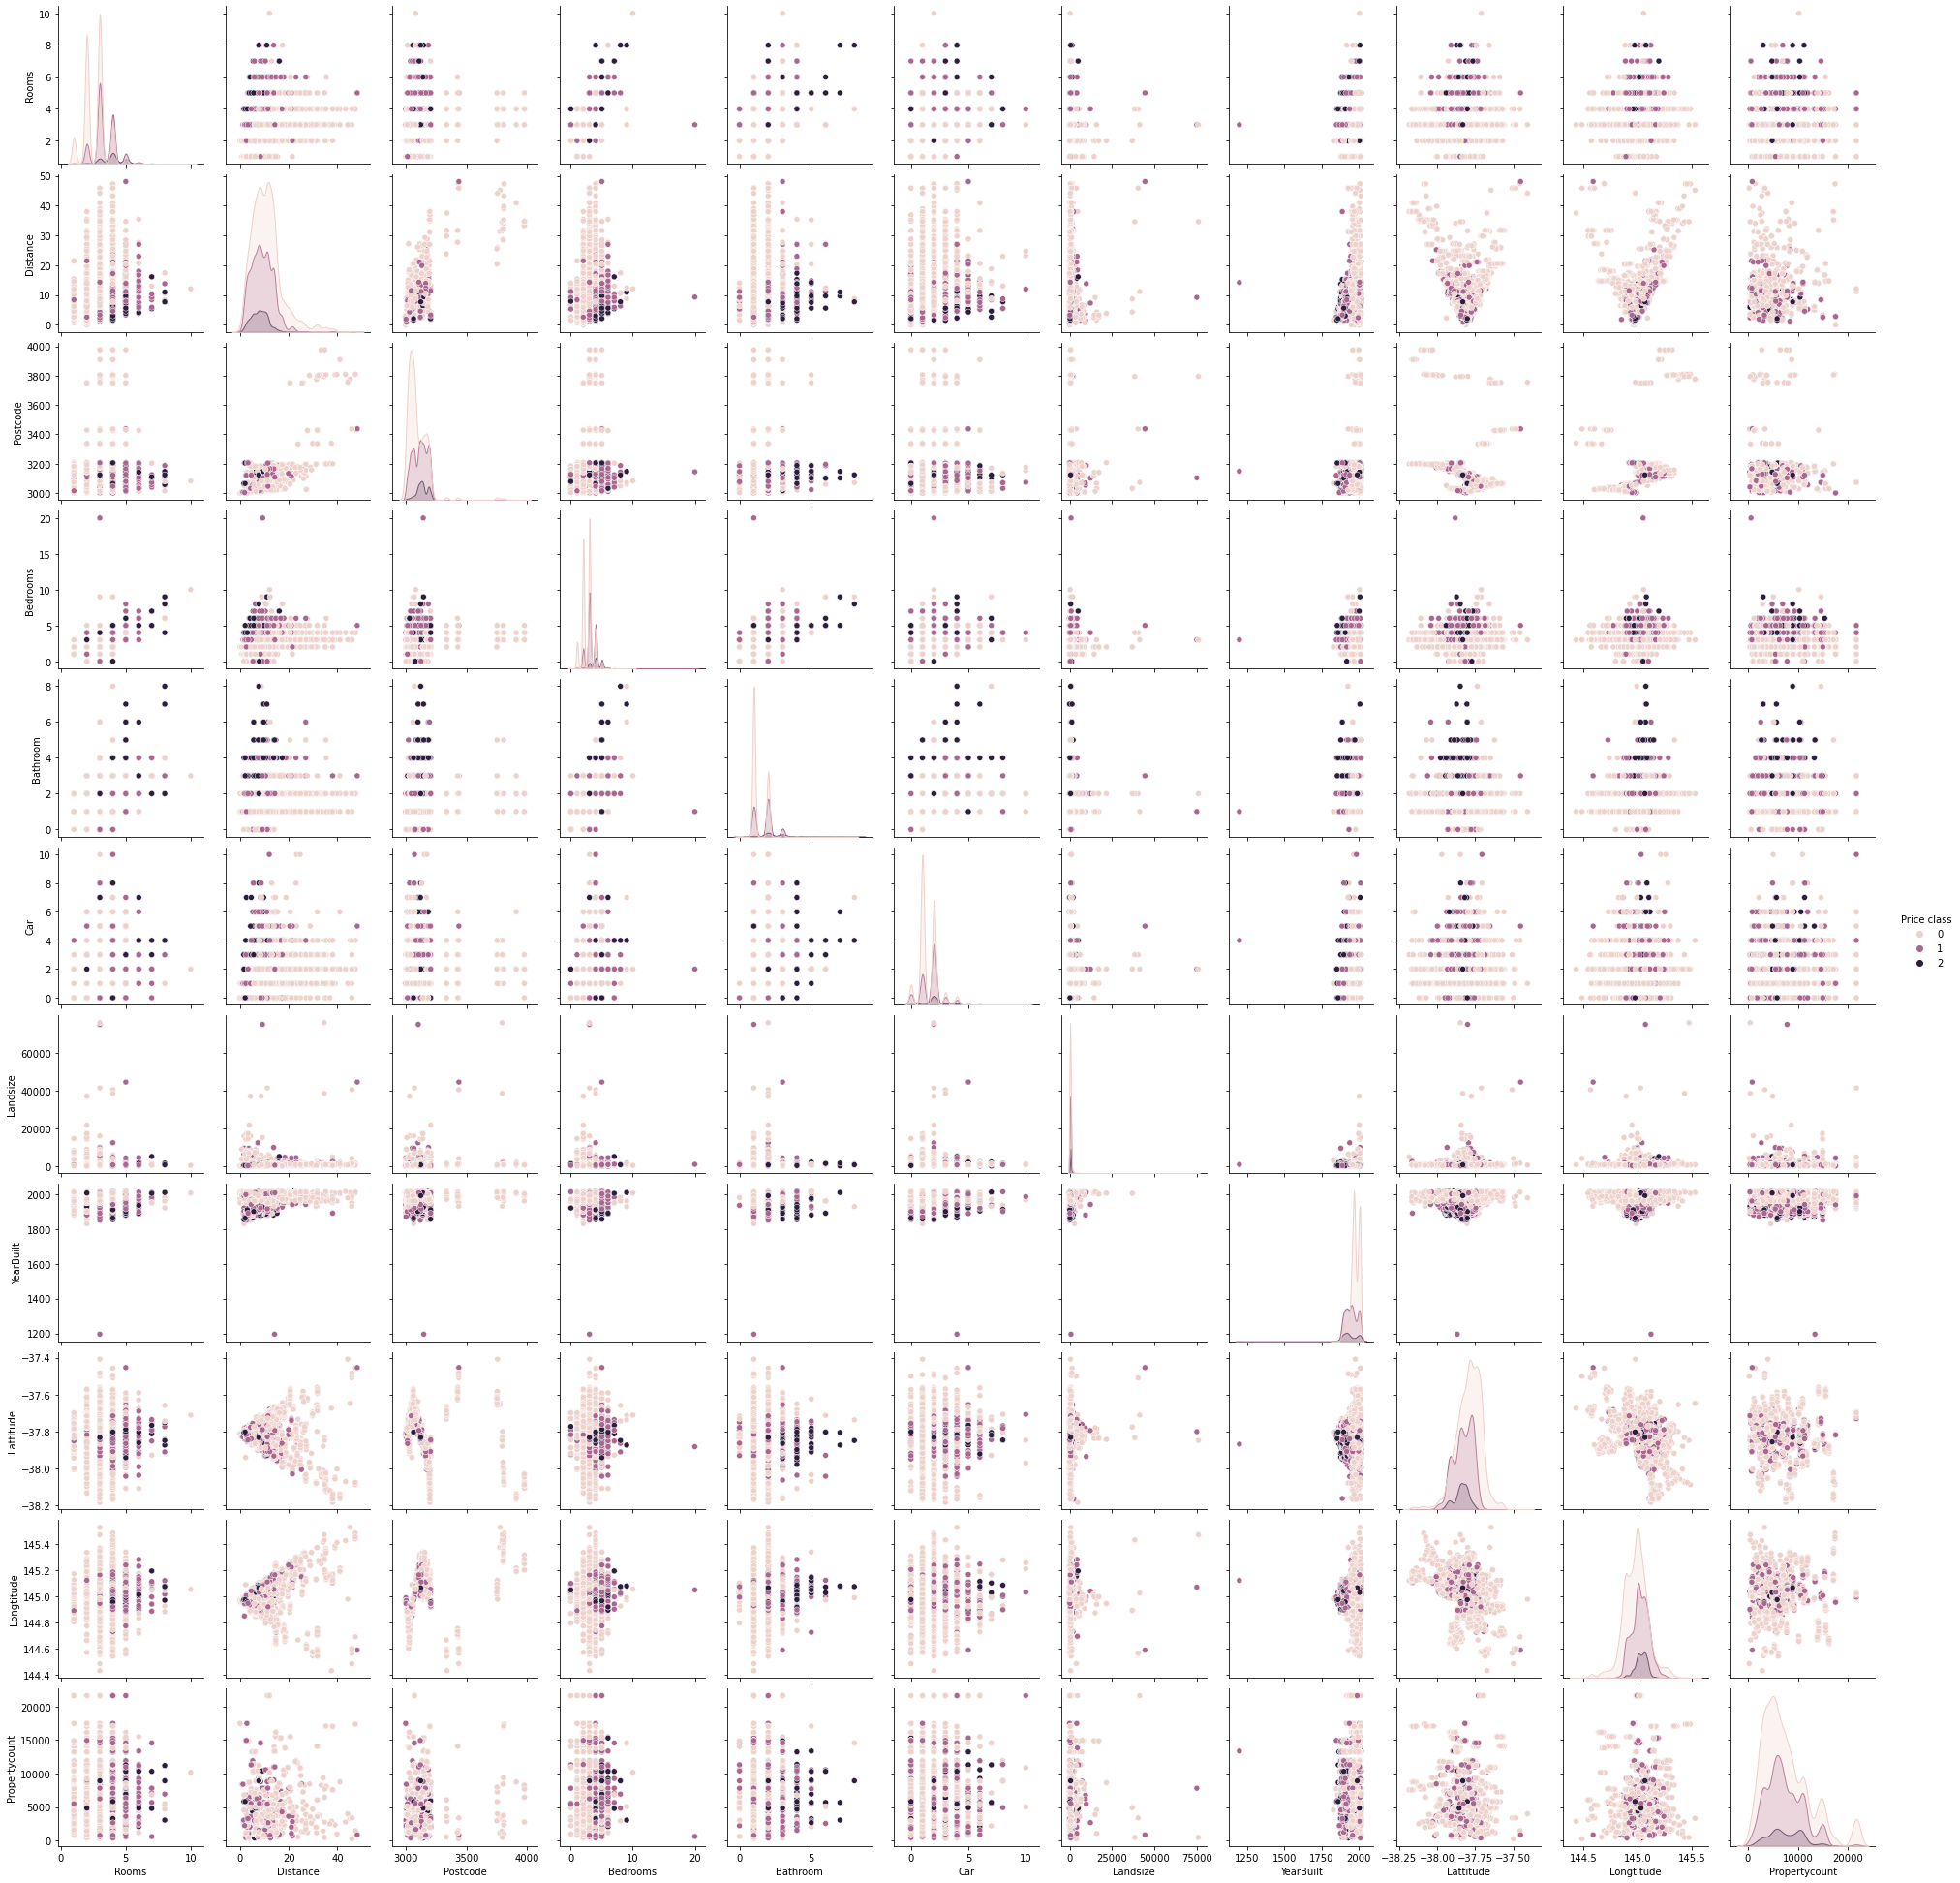

In [169]:
# Plot pairplot to see the distributions
print('Pairplot of train data:')
sns.pairplot(raw_train, hue='Price class')
plt.show()

Pairplot of test data:


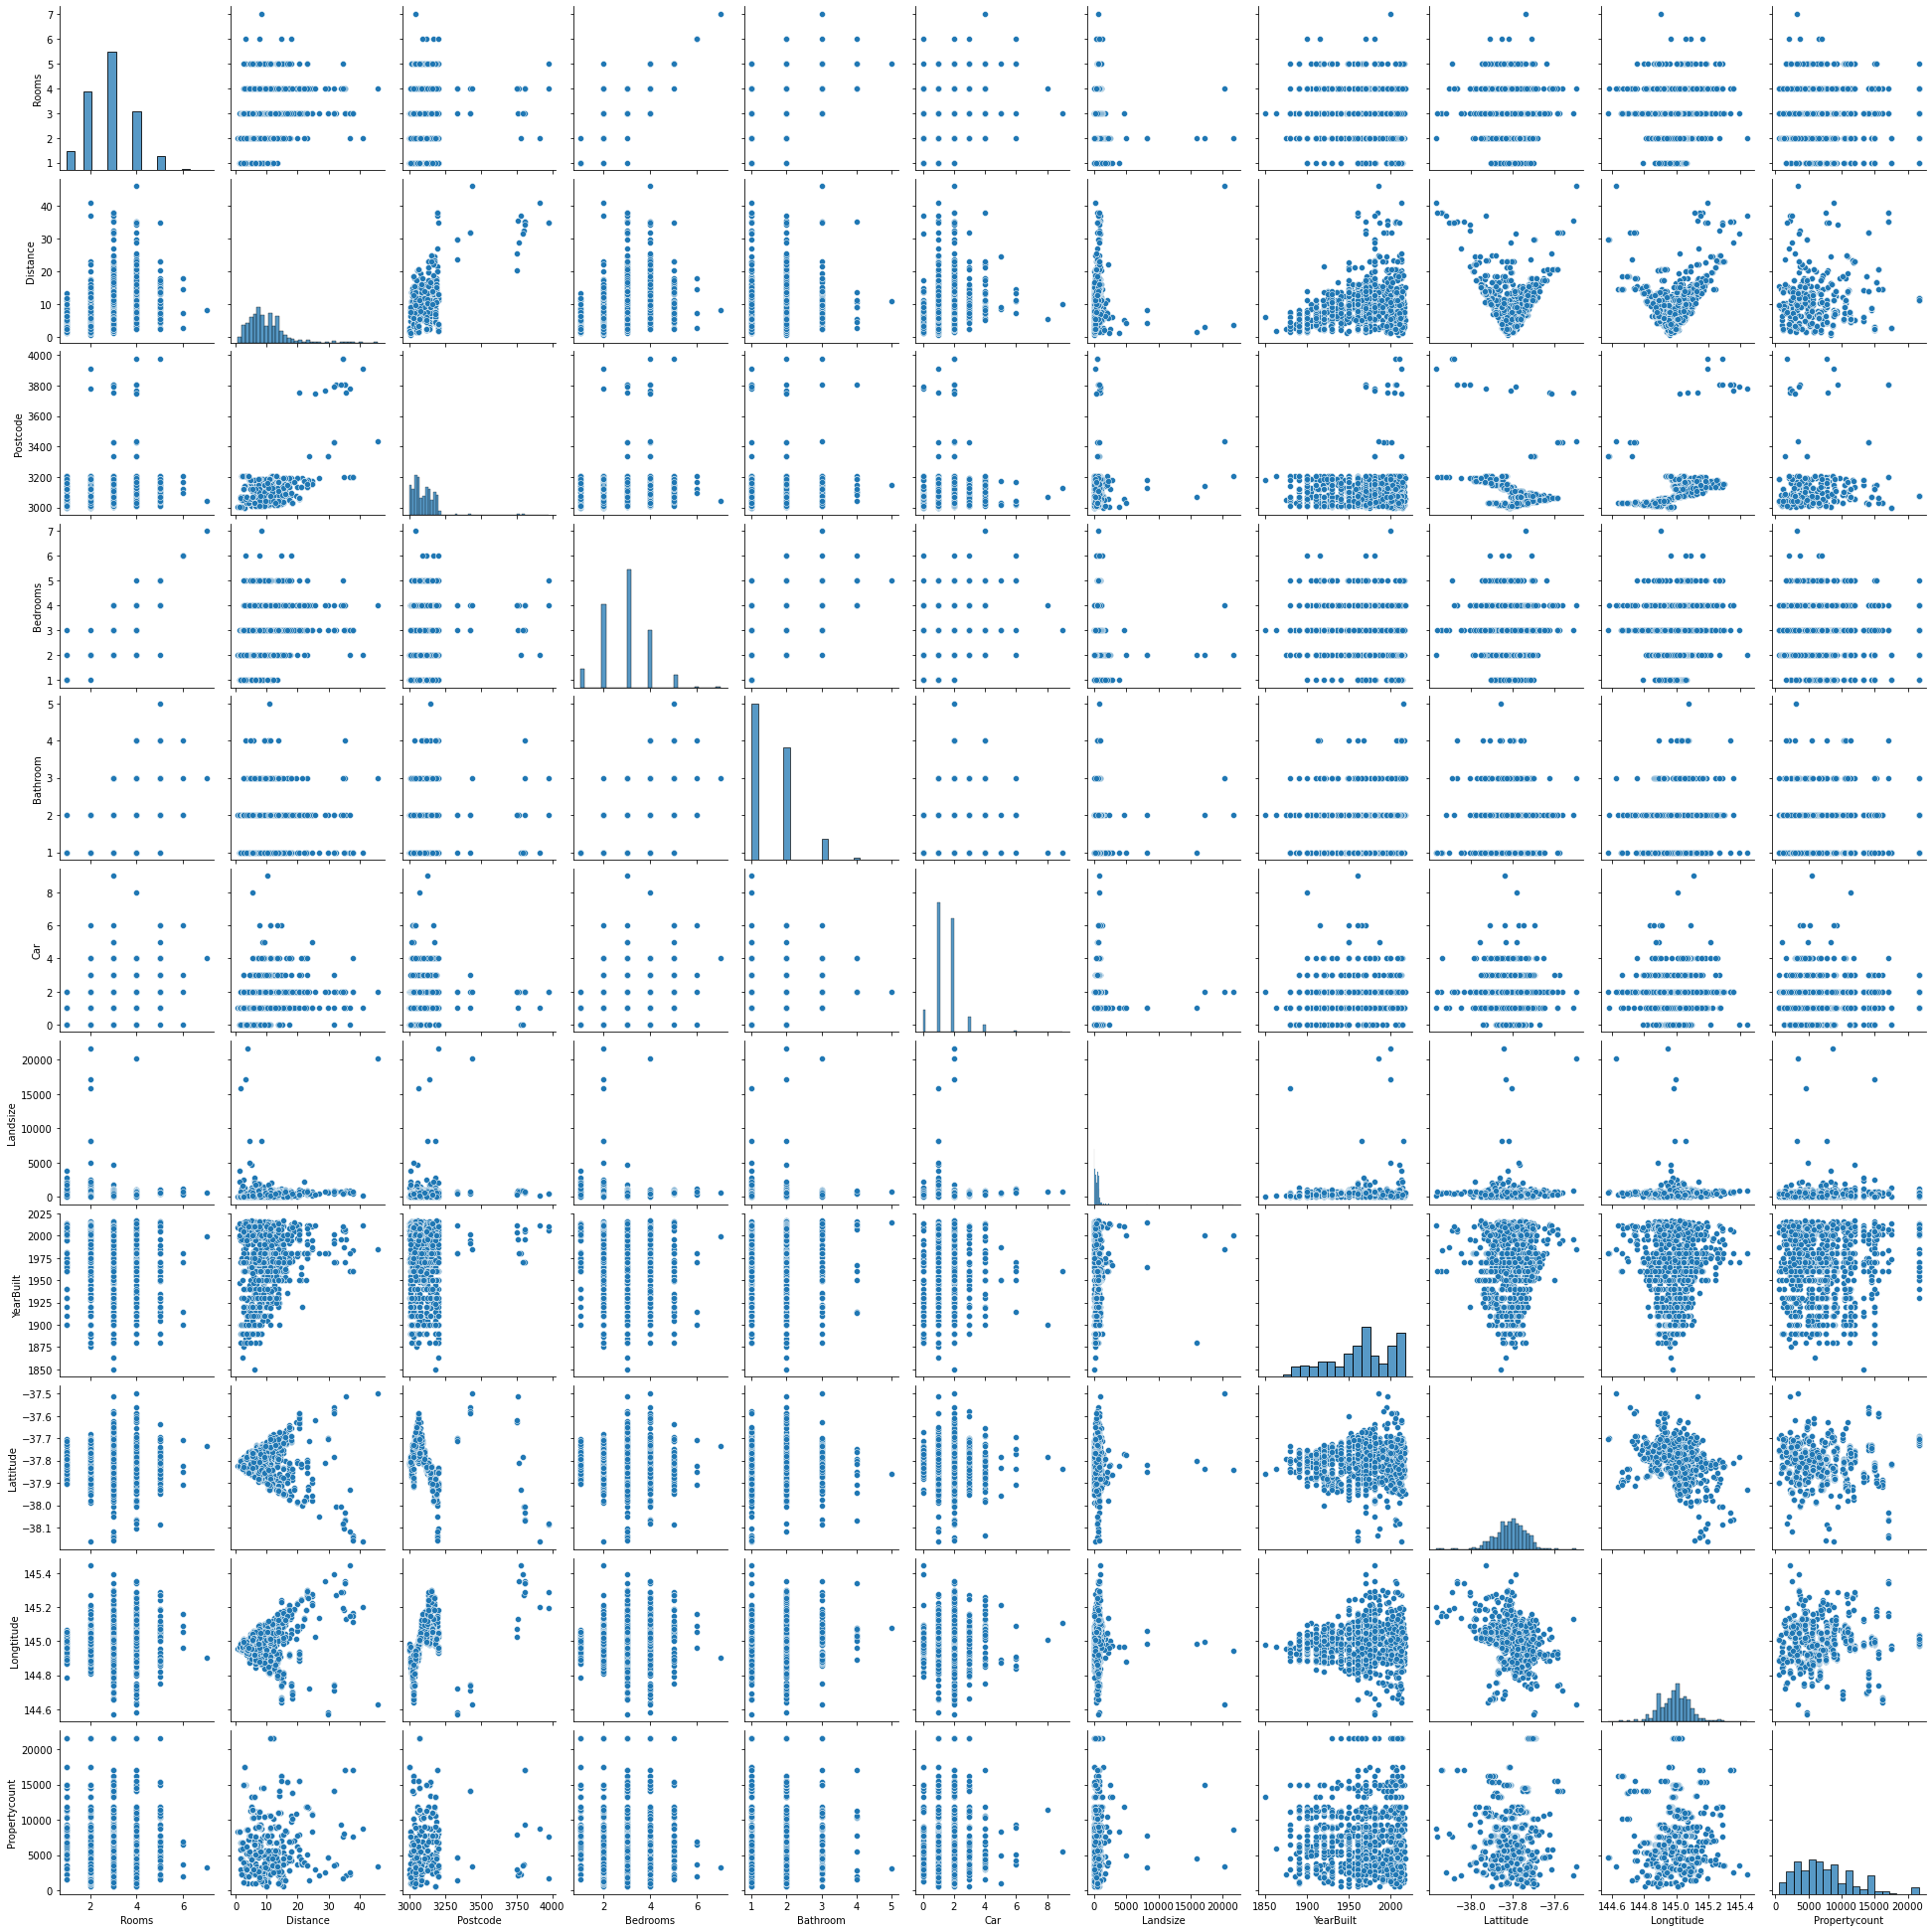

In [170]:
print('Pairplot of test data:')
sns.pairplot(raw_test)
plt.show()

Boxplot of train data:


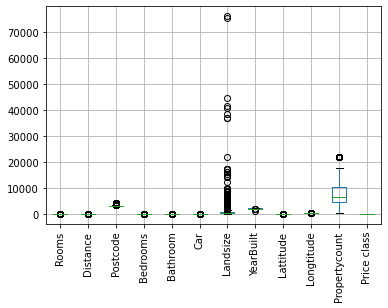

In [173]:
# Plot a boxplot to see if there are outliers in the data
print('Boxplot of train data:')
raw_train.boxplot()
plt.xticks(rotation=90)
plt.show()

Boxplot of test data:


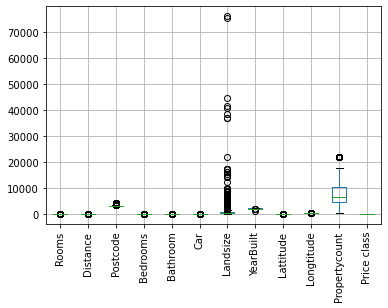

In [174]:
print('Boxplot of test data:')
raw_train.boxplot()
plt.xticks(rotation=90)
plt.show()

The boxplot indicates that there are some oultiers in the data sets.

Heatmap of train data


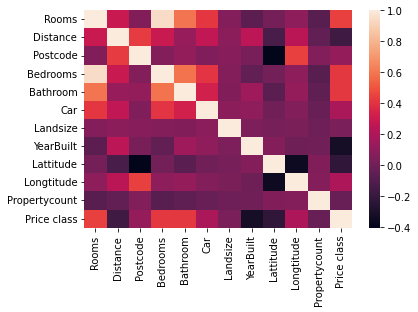

In [167]:
#Plot correlation matrix to see the correlation between the features
print('Heatmap of train data')
corr_train = sns.heatmap(raw_train.corr())
plt.show()

Heatmap of test data


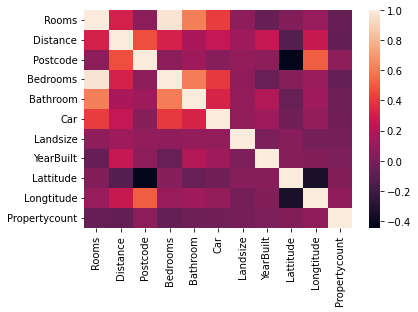

In [168]:
print('Heatmap of test data')
corr_test = sns.heatmap(raw_test.corr())
plt.show()

The features Rooms and Bedrooms are highly correlated.

### Data cleaning

In [94]:
train_df = raw_train.copy() # Make copy of raw data before cleaning

# Impute nan by most frequent value for the features with missing values. 
imr = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
imr = imr.fit(train_df[['Landsize', 'Propertycount', 'Bathroom', 'Car', 'YearBuilt']])
train_df[['Landsize', 'Propertycount', 'Bathroom', 'Car', 'YearBuilt']] = imr.transform(train_df[['Landsize', 'Propertycount', 'Bathroom', 'Car', 'YearBuilt']])

### Data exploration after cleaning

In [95]:
train_df.isna().sum() # Check if all nan values are been filled

Rooms            0
Type             0
Method           0
Distance         0
Postcode         0
Bedrooms         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Price class      0
dtype: int64

### Data preprocessing

In [96]:
# Leave out target before encoding
train_X = train_df.iloc[:,:-1]
train_y = train_df['Price class']
# Make copy of data before encoding
train_x_enc = train_X.copy()
test_x_enc = raw_test.copy()

In [65]:
# Transform the columns with categorical data (Type, Method, Regionname) with one-hot encoding via pandas for the train set
# Drop one feature column to avoid highly correlated features
train_x_enc = pd.get_dummies(train_x_enc, drop_first=True)
train_x_enc

,Rooms,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,4,6.4,3011.0,3.0,1.0,2.0,411.0,1970.0,-37.79690,144.90490,...,0,0,0,0,0,0,0,0,1,0
1,4,14.6,3189.0,4.0,1.0,2.0,638.0,1972.0,-37.93780,145.05700,...,0,0,0,0,0,0,0,1,0,0
2,5,12.4,3107.0,5.0,4.0,2.0,968.0,1970.0,-37.77083,145.11516,...,0,0,0,0,0,0,0,0,0,0
3,3,5.2,3056.0,3.0,1.0,2.0,264.0,1970.0,-37.76110,144.96440,...,0,1,0,0,1,0,0,0,0,0
4,3,8.8,3072.0,3.0,1.0,2.0,610.0,1970.0,-37.75100,145.01970,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11538,3,7.7,3124.0,3.0,2.0,2.0,593.0,1991.0,-37.83176,145.06520,...,0,0,0,0,0,0,0,1,0,0
11539,3,7.8,3058.0,3.0,1.0,2.0,120.0,1990.0,-37.74620,144.97950,...,0,0,0,0,1,0,0,0,0,0
11540,3,11.4,3084.0,3.0,1.0,2.0,1016.0,1950.0,-37.72990,145.06560,...,0,1,0,0,0,0,0,0,0,0
11541,2,17.3,3193.0,2.0,1.0,1.0,0.0,1970.0,-37.96341,145.01735,...,0,0,0,0,0,0,0,1,0,0


In [66]:
# Do the same for the test set
test_x_enc = pd.get_dummies(test_x_enc, drop_first=True)
test_x_enc

,Rooms,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,4,11.8,3105.0,4.0,2.0,2.0,190.0,2000.0,-37.76640,145.08840,...,0,1,0,0,0,0,0,0,0,0
1,3,6.2,3123.0,3.0,1.0,2.0,616.0,1920.0,-37.81724,145.05688,...,0,0,1,0,0,0,0,1,0,0
2,3,3.3,3206.0,3.0,2.0,2.0,0.0,2000.0,-37.84510,144.95110,...,0,0,0,0,0,0,0,1,0,0
3,2,13.9,3165.0,2.0,1.0,1.0,591.0,1960.0,-37.91790,145.07100,...,0,0,0,0,0,0,0,1,0,0
4,2,2.5,3067.0,2.0,2.0,1.0,124.0,2013.0,-37.80790,144.99770,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,4,13.9,3165.0,3.0,3.0,2.0,291.0,2014.0,-37.93470,145.05460,...,0,0,0,0,0,0,0,1,0,0
1226,5,5.5,3070.0,5.0,2.0,2.0,692.0,1920.0,-37.77840,145.00350,...,0,0,0,0,1,0,0,0,0,0
1227,3,13.9,3108.0,3.0,1.0,1.0,638.0,1970.0,-37.79120,145.12480,...,0,0,0,0,0,0,0,0,0,0
1228,3,12.8,3033.0,4.0,1.0,1.0,554.0,1960.0,-37.73030,144.86360,...,0,0,0,0,0,0,0,0,1,0


#### Train test split

In [158]:
# Define the original train data and original test data
X_train_set = train_x_enc.values
y_train_set = train_df['Price class'].values
X_test_set = test_x_enc.values

# Split the train set into train and test sets to use for training and hyperparameter- tuning
X_train, X_test, y_train, y_test = train_test_split(
    X_train_set, y_train_set, test_size=0.3,
    stratify=y_train_set, random_state=0)

#### Scaling

In [97]:
# Scale the original train data and test data
sc = StandardScaler() # Initialise standard scaler
sc.fit(X_train_set) # Compute mean and STD from training data
X_train_set_sc = sc.transform(X_train_set) # Standardize X_train with mean and STD from training data
X_test_set_sc = sc.transform(X_test_set) # Standardize X_test with mean and STD from training data

### Modelling

#### Data pipeline with kernel

In this part a pipeline for the classifer SVC with the kernel method 'rbf' will be used and then the tuning of the paramter C and gamma will be done by using Gridsearch.

In [99]:
# Define the pipeline for SVC, scaling and classifier:
pipe_svc = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', random_state=1))
pipe_svc.fit(X_train, y_train)
pipe_svc.get_params() # Get the name of the parameters

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC(random_state=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': 1,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [24]:
# Tune the hyperparamters C and gamma for the SVC (kernel = 'rbf') by using Sklearn GridSerchCV = CV=7
# Define ranges of parameter values:
param_C  = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] 
param_gamma = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid   = [{'svc__C': param_C, 'svc__gamma': param_gamma}] # Define the parameter grid 

start = time.time()

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=7, n_jobs=-1)

gs = gs.fit(X_train, y_train)

end = time.time()

acc_svc = gs.best_score_
optimal_par_svc = gs.best_params_

print('Average cross-validated accuracy score:', acc_svc) 
print('Optimal parameters:', optimal_par_svc)  
print(f'Time used: {end - start}')

Average cross-validated accuracy score: 0.8396085139586006
Optimal parameters: {'svc__C': 100.0, 'svc__gamma': 0.01}
Time used: 904.003968000412


#### Data pipeline with regularization
In this part a pipeline for the classifer Logistic regression with l2 regularization will be used and then the tuning of the paramter C will be done by using Gridsearch.

In [100]:
# Define the pipeline for Logistic Regression:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=2, solver='liblinear', multi_class='auto', penalty='l2'))
pipe_lr.fit(X_train, y_train)
pipe_lr.get_params() # Get the name of the parameters

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(random_state=2, solver='liblinear'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(random_state=2, solver='liblinear'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 2,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [26]:
# Tune the hyperparamters C for the logistic regression classifier by using Sklearn GridSerchCV , CV = 10
# Define range for parameter C:
C_range  = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] 

param_grid   = [{'logisticregression__C': C_range}] # Define the parameter grid 

start = time.time()

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

end = time.time()

acc_lr = gs.best_score_
optimal_lr = gs.best_params_

train_score_lr = gs.score(X_train, y_train)
test_score_lr = gs.score(X_test, y_test)

print('Average cross- validated accuracy score:', acc_lr) 
print('Optimal parameters:', optimal_lr) 
print(f'Time used: {end - start}')

Average cross- validated accuracy score: 0.8001237623762376
Optimal parameters: {'logisticregression__C': 10.0}
Time used: 12.250818014144897


#### Other models used for Kaggle submission

A pipeline for the Random Forest Classifier will be created and the tuning of the parameters maximum depth and n-estimators will be done with the Gridsearch.

In [142]:
# Define the pipeline for Random Forest Classifier:
pipe_rf = make_pipeline(RandomForestClassifier(criterion='gini', random_state=6, n_jobs=-1))
pipe_rf.fit(X_train, y_train)
pipe_rf.get_params() # Get the name of the parameters

{'memory': None,
 'steps': [('randomforestclassifier',
   RandomForestClassifier(n_jobs=-1, random_state=6))],
 'verbose': False,
 'randomforestclassifier': RandomForestClassifier(n_jobs=-1, random_state=6),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_impurity_split': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': -1,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__rando

In [28]:
# Define ranges of parameter values:
n_estimator = [*range(10,550,50)]
maximum_depth = [*range(10,350,20)]

# Define the parameter grid 
param_grid   = [{'randomforestclassifier__n_estimators': n_estimator, 'randomforestclassifier__max_depth': maximum_depth}]
start = time.time()

gs = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)

end = time.time()

acc_rf = gs.best_score_
optimal_par_rf = gs.best_params_

print('Average cross-validated accuracy score:', acc_rf) 
print('Optimal parameters:', optimal_par_rf)  
print(f'Time used: {end - start}')

Average cross-validated accuracy score: 0.8570544554455445
Optimal parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 160}
Time used: 2117.6400530338287


### Final Evaluation and confusion matrix

Confusion matrix for SVC:


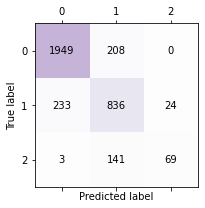

Confusion matrix for Logistic Regression:


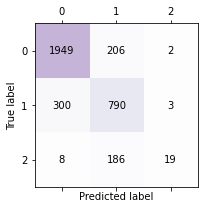

Confusion matrix for Random Forest:


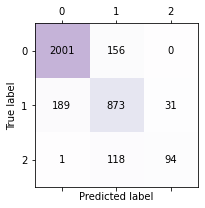

In [144]:
def cf_matrix(model_name, pipeline, X_test_data, y_test_data):
    y_prediction = pipeline.predict(X_test_data)
    
    print(f'Confusion matrix for {model_name}:')
    confmat = confusion_matrix(y_true=y_test_data, y_pred=y_prediction)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Purples, alpha=0.3)
    
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
cf_svc = cf_matrix('SVC', pipe_svc, X_test, y_test)
cf_lr = cf_matrix('Logistic Regression' , pipe_lr, X_test, y_test)
cf_rf = cf_matrix('Random Forest' , pipe_rf, X_test, y_test)

Here SVC seems to be better at predicting class 1 and 2 correctly than the Logistic Regression, and Random Forest is relatively better at predicting the three classes correctly than the other classifiers.

In [35]:
# Predict on the test data to use to evaluate model performance
y_pred_svc = pipe_svc.predict(X_test)
y_pred_lr = pipe_lr.predict(X_test)
y_pred_rf = pipe_rf.predict(X_test)

In [103]:
# Print a classification report for each model to get some metrics for evaluation
print(f'Classification report for SVC:\n {classification_report(y_test, y_pred_svc, digits=4)}')
print('----------------------------------------------------------')
print(f'Classification report for Logistic regression:\n {classification_report(y_test, y_pred_lr, digits=4)}')
print('----------------------------------------------------------')
print(f'Classification report for Random Forest:\n {classification_report(y_test, y_pred_rf, digits=4)}')

Classification report for SVC:
               precision    recall  f1-score   support

           0     0.8920    0.9036    0.8977      2157
           1     0.7055    0.7649    0.7340      1093
           2     0.7419    0.3239    0.4510       213

    accuracy                         0.8241      3463
   macro avg     0.7798    0.6641    0.6942      3463
weighted avg     0.8239    0.8241    0.8186      3463

----------------------------------------------------------
Classification report for Logistic regression:
               precision    recall  f1-score   support

           0     0.8635    0.9036    0.8831      2157
           1     0.6684    0.7228    0.6945      1093
           2     0.7917    0.0892    0.1603       213

    accuracy                         0.7964      3463
   macro avg     0.7745    0.5719    0.5793      3463
weighted avg     0.7975    0.7964    0.7791      3463

----------------------------------------------------------
Classification report for Random Forest:

Random Forest is overall better than LR and SVC.

### Kaggle submission

Random Forest is used for the final prediction, based on the evaluation metrics above.

In [37]:
# Training Random Forest model with optimal parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 160}
rf = RandomForestClassifier(criterion='gini',
                                    n_estimators=160,
                                    max_depth=30,
                                    random_state=88,
                                    n_jobs=-1)
rf.fit(X_train_set, y_train_set)

rf_pred = rf.predict(X_test_set) # Prediction


In [38]:
# Submission file
rf1_result = pd.DataFrame({'index': raw_test.index.copy(),'Price class': rf_pred})
rf1_result.set_index('index')
submission_rf1 = rf1_result.to_csv('CA4-SUB-ALL_F_MostFreq_OneHotDropFirst_RandomForest_6.csv', index=False)

#### ROC Curve for binary classificaion problem
The Random Forest pipeline from the section "Other models used for Kaggle submission" is used to predict the probability of classes for the ROC curve.

In [104]:
# Keep all samples that only belongs to Price class = 1 and 2 
X_train_binary = train_df[train_df['Price class'] != 0]
# Extract target
y_train_b = X_train_binary['Price class'].values
# Define features in X
X_train_b1 = X_train_binary.iloc[:,:-1]
# One hot enc. for the categorical features
X_train_b = X_train_b1.copy()
X_train_b = pd.get_dummies(X_train_b, drop_first=True).values

In [72]:
# Split the train set into train, test sets to use for creating the ROC curve
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X_train_b, y_train_b, test_size=0.3,
    stratify=y_train_b, random_state=0)

In [73]:
X_train_b

array([[4.000e+00, 6.400e+00, 3.011e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.000e+00, 1.460e+01, 3.189e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+00, 1.240e+01, 3.107e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.000e+00, 7.900e+00, 3.079e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 3.300e+00, 3.206e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 7.700e+00, 3.124e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

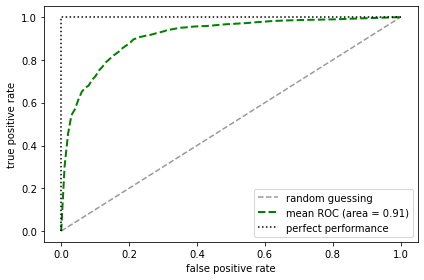

In [178]:
# Specify the CV and store the splits in a list in order to use the indices for creating the curve later
# CV = 5
cv = list(StratifiedKFold(n_splits=5).split(X_train5, y_train5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Loop through folds of CV
for i, (train, test) in enumerate(cv):
    # Predict probability of classes
    probas = pipe_rf.fit(X_train5[train],
                         y_train5[train]).predict_proba(X_train5[test])

    # Define False Positive and True Positive Rates (thresholds for the decision function). 
    # The Positive class is set to be class = 2
    fpr, tpr, thresholds = roc_curve(y_train5[test],
                                     probas[:, 1],
                                     pos_label=2)
    
    # Add interpolated values to the mean True Predictive Rate
    mean_tpr += interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)

# Plot the line equal to random guessing
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

# Average True Positive Rate
mean_tpr /= len(cv)
mean_tpr[0] = 0.0
mean_tpr[-1] = 1.0

# Average AUC
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, '--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2,
        color = 'green')
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()